In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from datetime import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Conv1D,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Reshape
)
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df     = pd.read_csv('/content/weather_prediction_dataset.csv')
df_bbq = pd.read_csv('/content/weather_prediction_bbq_labels.csv')

In [3]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


In [4]:
df_bbq.head()

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

In [6]:
len(df_bbq.columns), df_bbq.columns

(18,
 Index(['DATE', 'BASEL_BBQ_weather', 'BUDAPEST_BBQ_weather', 'DE_BBQ_weather',
        'DRESDEN_BBQ_weather', 'DUSSELDORF_BBQ_weather', 'HEATHROW_BBQ_weather',
        'KASSEL_BBQ_weather', 'LJUBLJANA_BBQ_weather', 'MAASTRICHT_BBQ_weather',
        'MALMO_BBQ_weather', 'MONTELIMAR_BBQ_weather', 'MUENCHEN_BBQ_weather',
        'OSLO_BBQ_weather', 'PERPIGNAN_BBQ_weather', 'SONNBLICK_BBQ_weather',
        'STOCKHOLM_BBQ_weather', 'TOURS_BBQ_weather'],
       dtype='object'))

In [7]:
df_bbq.columns[30:41]

Index([], dtype='object')

In [8]:
required_columns = [
    'DATE', 'DRESDEN_cloud_cover','DRESDEN_wind_speed','DRESDEN_wind_gust',
    'DRESDEN_humidity','DRESDEN_global_radiation','DRESDEN_precipitation',
    'DRESDEN_sunshine','DRESDEN_temp_mean','DRESDEN_temp_min','DRESDEN_temp_max'
]

missing = [c for c in required_columns if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

df_Dresden = df[required_columns].copy()
df_Dresden['BBQ'] = df_bbq['DRESDEN_BBQ_weather']

In [9]:
df_Dresden['BBQ'] = df_bbq['DRESDEN_BBQ_weather'];

In [10]:
df_Dresden

,DATE,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,BBQ
0,20000101,8,3.2,7.2,0.89,0.09,0.32,0.0,1.0,-1.8,2.0,False
1,20000102,7,4.0,8.8,0.89,0.23,0.00,0.4,2.5,1.4,4.0,False
2,20000103,7,5.4,12.1,0.79,0.18,0.00,0.0,4.2,1.3,5.1,False
3,20000104,8,6.0,14.4,0.88,0.11,0.22,0.0,4.4,3.4,5.2,False
4,20000105,2,5.6,15.8,0.76,0.49,0.00,5.7,1.8,-0.5,6.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,6,5.4,13.0,0.83,0.21,0.00,0.0,2.1,0.0,3.9,False
3650,20091229,6,4.0,13.0,0.80,0.44,0.31,6.2,0.2,-2.7,2.6,False
3651,20091230,8,2.6,9.4,0.95,0.12,0.89,0.0,1.6,0.2,3.7,False
3652,20091231,8,2.6,5.8,0.97,0.07,0.24,0.0,-0.2,-1.0,1.9,False


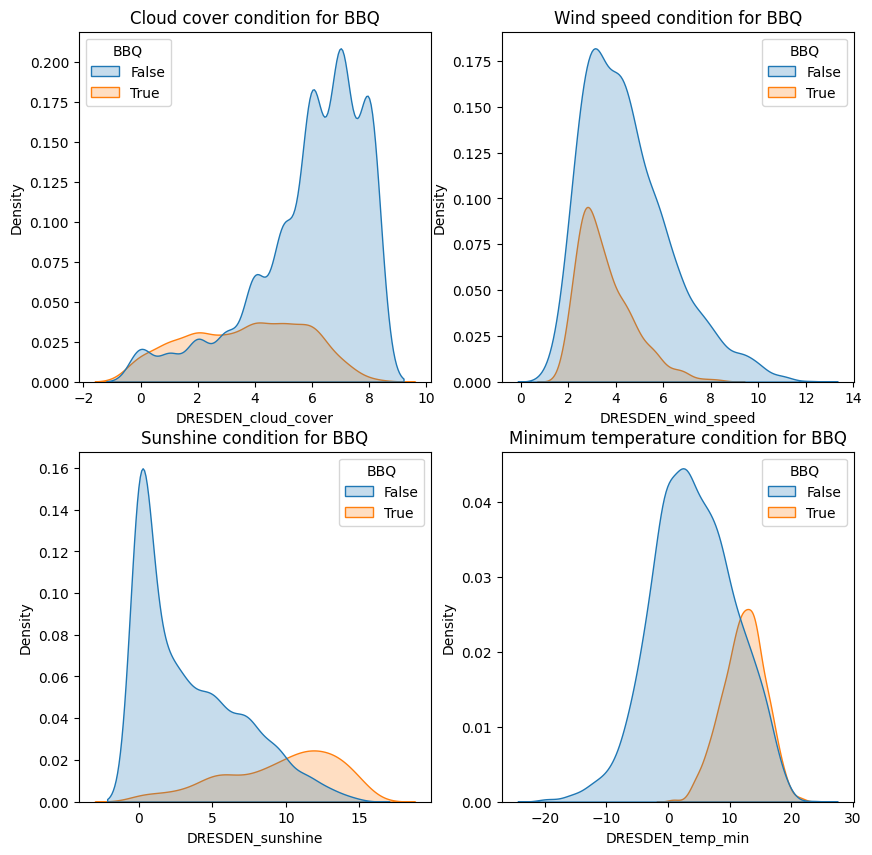

In [11]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
sns.kdeplot(data=df_Dresden, x='DRESDEN_cloud_cover', hue='BBQ', fill=True, ax=axs[0,0])
axs[0,0].set_title('Cloud cover condition for BBQ')
sns.kdeplot(data=df_Dresden, x='DRESDEN_wind_speed', hue='BBQ', fill=True, ax=axs[0,1])
axs[0,1].set_title('Wind speed condition for BBQ')
sns.kdeplot(data=df_Dresden, x='DRESDEN_sunshine', hue='BBQ', fill=True, ax=axs[1,0])
axs[1,0].set_title('Sunshine condition for BBQ')
sns.kdeplot(data=df_Dresden, x='DRESDEN_temp_min', hue='BBQ', fill=True, ax=axs[1,1])
axs[1,1].set_title('Minimum temperature condition for BBQ')
plt.show()

<ipython-input-12-f427b747264a>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_Dresden, x='DRESDEN_precipitation', hue='BBQ', fill=True, ax=axs[1,0])


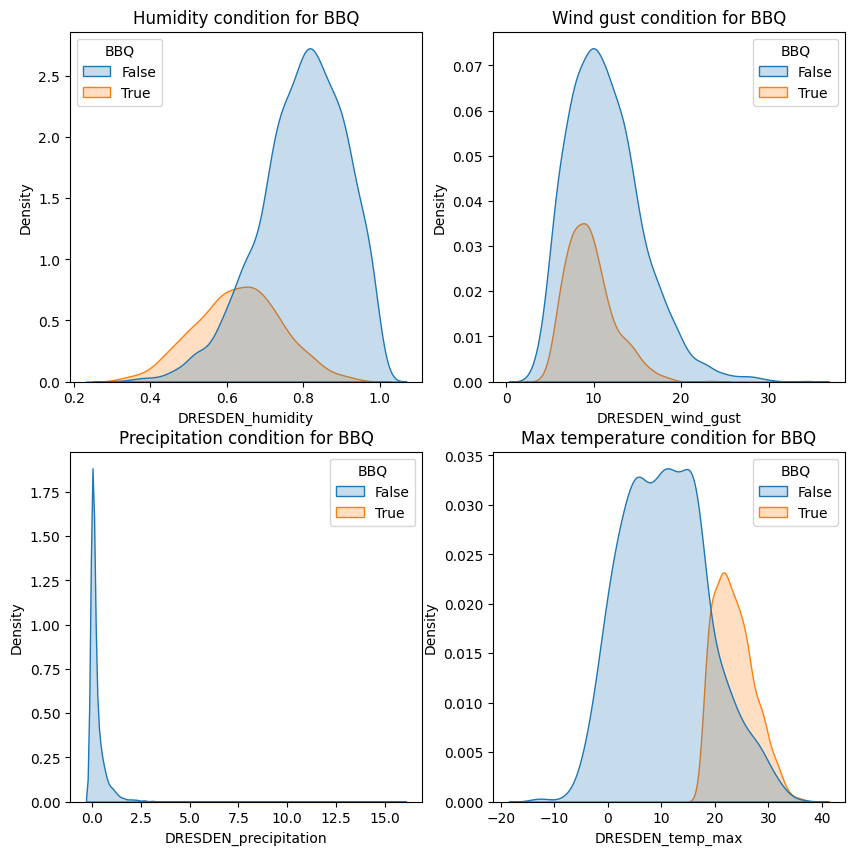

In [12]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
sns.kdeplot(data=df_Dresden, x='DRESDEN_humidity', hue='BBQ', fill=True, ax=axs[0,0])
axs[0,0].set_title('Humidity condition for BBQ')
sns.kdeplot(data=df_Dresden, x='DRESDEN_wind_gust', hue='BBQ', fill=True, ax=axs[0,1])
axs[0,1].set_title('Wind gust condition for BBQ')
sns.kdeplot(data=df_Dresden, x='DRESDEN_precipitation', hue='BBQ', fill=True, ax=axs[1,0])
axs[1,0].set_title('Precipitation condition for BBQ')
sns.kdeplot(data=df_Dresden, x='DRESDEN_temp_max', hue='BBQ', fill=True, ax=axs[1,1])
axs[1,1].set_title('Max temperature condition for BBQ')
plt.show()

In [13]:
X = df_Dresden.drop(['DATE','BBQ'], axis = 1)
y = df_Dresden['BBQ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 28)
len(X_train), len(X_test)

(2923, 731)

**ANN Model**

In [14]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

model = Sequential([
    Dense(X_train.shape[1], activation="relu"),
    Dense(int(X_train.shape[1] / 2), activation="relu"),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(
    x=X_train,
    y=y_train,
    epochs=150,
    validation_data=(X_test, y_test),
    verbose=1
)

(2923, 10)
(2923,)
(731, 10)
(731,)
Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6731 - loss: 0.5654 - val_accuracy: 0.8947 - val_loss: 0.2686
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8638 - loss: 0.2810 - val_accuracy: 0.8837 - val_loss: 0.2386
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8761 - loss: 0.2650 - val_accuracy: 0.8906 - val_loss: 0.2295
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8760 - loss: 0.2587 - val_accuracy: 0.8947 - val_loss: 0.2232
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8844 - loss: 0.2495 - val_accuracy: 0.8988 - val_loss: 0.2214
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8847 - loss: 0.2397 - val_accuracy: 0.9001 - val_loss: 0.2158
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8755 - loss: 0.2461 - val_accuracy: 0.9001 - val_loss: 0.2125
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8880 - los

<Axes: title={'center': 'ANN Accuracy'}>

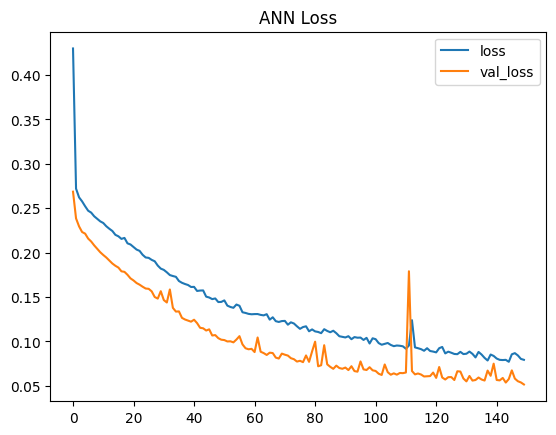

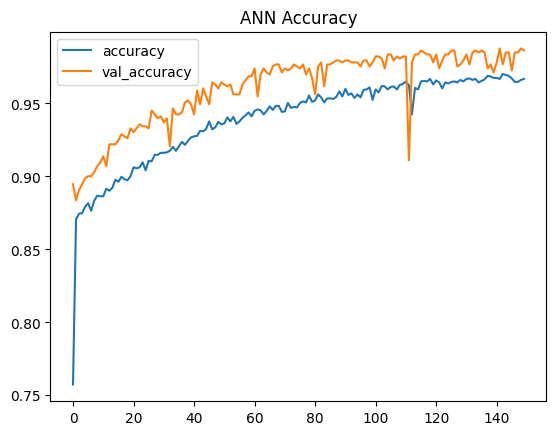

In [15]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot(title='ANN Loss')
model_loss_acc[['accuracy', 'val_accuracy']].plot(title='ANN Accuracy')

In [16]:
predictions = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [17]:
predictions = (predictions > 0.5).astype(int)

In [18]:
ann_acc = accuracy_score(y_test, predictions)
print("Accuracy:", ann_acc)

Accuracy: 0.9863201094391245


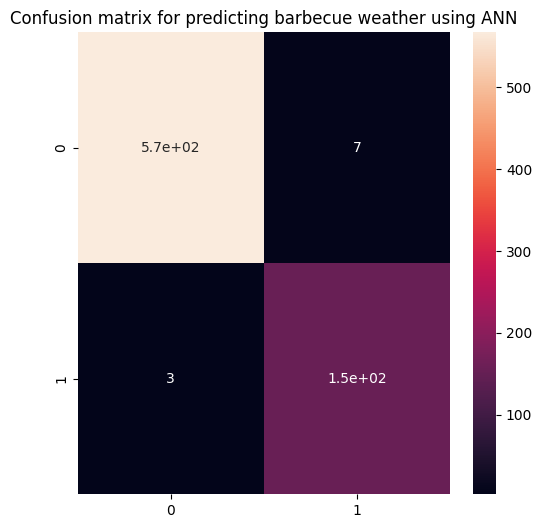

In [19]:
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title('Confusion matrix for predicting barbecue weather using ANN');

**CNN Model**

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2923, 10)
(2923,)
(731, 10)
(731,)


In [21]:
X_train_r = X_train.values.reshape(-1, 1, X_train.shape[1], 1)
X_test_r  = X_test.values.reshape(-1, 1, X_test.shape[1], 1)

In [22]:
model_2 = Sequential([
    Conv2D(16, (1,2), activation='relu', input_shape=(1, X_train.shape[1], 1)),
    MaxPooling2D(pool_size=(1,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model_2.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1, 9, 16)       │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,273 (16.69 KB)

 Trainable params: 4,273 (16.69 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history2 = model_2.fit(
    x=X_train_r, y=y_train,
    epochs=150,
    validation_data=(X_test_r, y_test),
    verbose=1
)

Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6526 - loss: 0.8574 - val_accuracy: 0.9083 - val_loss: 0.2592
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8589 - loss: 0.3292 - val_accuracy: 0.9097 - val_loss: 0.2338
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8825 - loss: 0.2757 - val_accuracy: 0.9042 - val_loss: 0.2180
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8875 - loss: 0.2609 - val_accuracy: 0.9042 - val_loss: 0.2261
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8847 - loss: 0.2662 - val_accuracy: 0.9138 - val_loss: 0.2035
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8862 - loss: 0.2667 - val_accuracy: 0.9138 - val_loss: 0.1990
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8853 - loss: 0.2386 - val_accuracy: 0.9193 - val_loss: 0.1969
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8891 - loss: 0.2288 - val_accuracy: 0.9207 - 

<Axes: title={'center': 'CNN Accuracy'}>

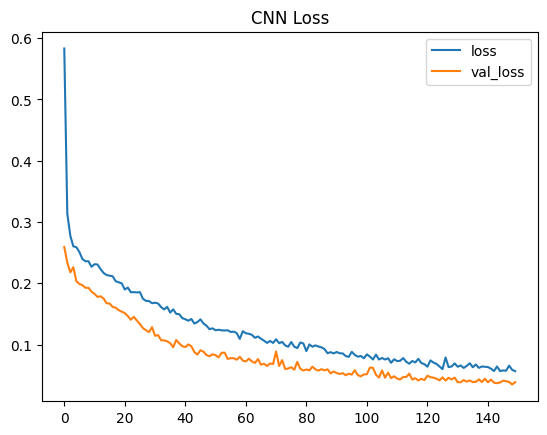

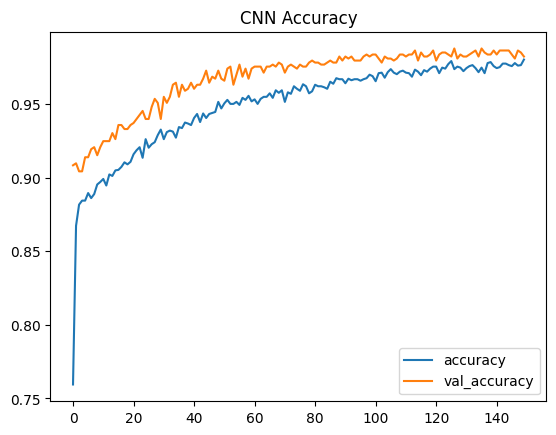

In [25]:
df_hist2 = pd.DataFrame(history2.history)
df_hist2[['loss', 'val_loss']].plot(title='CNN Loss')
df_hist2[['accuracy', 'val_accuracy']].plot(title='CNN Accuracy')

In [30]:
# pred_cnn = (model_2.predict(X_test_r) > 0.5).astype(int)
# cnn_acc = accuracy_score(y_test, pred_cnn)
# pred_cnn = model_2.predict(X_test_r)
pred_cnn = (pred_cnn > 0.5).astype(int)
cnn_acc = accuracy_score(y_test, pred_cnn)
print("Accuracy:", cnn_acc)

Accuracy: 0.9822161422708618


In [31]:
city = input("Enter the city name: ").strip()
api_key = "13c2eb7be082c3add466a9fde5d9d3ca"
url = (
    f"http://api.openweathermap.org/data/2.5/weather"
    f"?q={city}&appid={api_key}&units=metric"
)
resp = requests.get(url)
resp.raise_for_status()
data = resp.json()

# Extract fields
country      = data["sys"]["country"]
temp         = data["main"]["temp"]
feels_like   = data["main"]["feels_like"]
tmin         = data["main"]["temp_min"]
tmax         = data["main"]["temp_max"]
humidity     = data["main"]["humidity"]
weather_desc = data["weather"][0]["description"].title()
rain_flag    = "Yes" if "rain" in data else "No"

# Print output
print(f"\nCurrent Date and Time: {datetime.now().strftime('%a, %d %b %Y, %I:%M:%S %p')}\n")
print(f"City: {city}, {country}")
print(f"Current Temperature: {temp:.2f}°C")
print(f"Feels Like: {feels_like:.2f}°C")
print(f"Minimum Temperature: {tmin:.2f}°C")
print(f"Maximum Temperature: {tmax:.2f}°C")
print(f"Humidity: {humidity}%")
print(f"Weather Prediction: {weather_desc}")
print(f"Rain Prediction: {rain_flag}")
print(f"\nPrediction Accuracy : {cnn_acc * 100:.0f}%")

Enter the city name: Halisahar

Current Date and Time: Sun, 04 May 2025, 01:58:51 PM

City: Halisahar, IN
Current Temperature: 31.24°C
Feels Like: 32.42°C
Minimum Temperature: 31.24°C
Maximum Temperature: 31.24°C
Humidity: 47%
Weather Prediction: Broken Clouds
Rain Prediction: No

Prediction Accuracy : 98%
